In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [3]:
df = pd.read_csv("ds_salaries.csv")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [4]:
df.isnull().sum() # burada gözüktüğü gibi hiçbir boş veri yok. NaN veri yok.

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [6]:
df.shape # 3755 satır 11 adet sutun varmış.

(3755, 11)

In [7]:
df.info() # dataFrame hakkında info alırız.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [8]:
df.isnull().sum().sum() # komple dataframede boş veri yok

0

In [9]:
df["work_year"].value_counts() # unique değerlerin kaç adet olduğunu göreebiliriz.  yıllara göre kaç adet veri var görebiliriz.

2023    1785
2022    1664
2021     230
2020      76
Name: work_year, dtype: int64

In [10]:
df[df["work_year"] == 2023]["job_title"].value_counts().nlargest(10).reset_index() # yılı 2023 olan  job title alacağız. en fazla olan 10 değeri sonra reset index...

,index,job_title
0,Data Engineer,499
1,Data Scientist,370
2,Data Analyst,307
3,Machine Learning Engineer,158
4,Research Scientist,55
5,Data Architect,52
6,Analytics Engineer,46
7,Applied Scientist,40
8,Research Engineer,32
9,Data Manager,22


In [11]:
sbn.set_theme()
sbn.set(rc={"figure.figsize":(10,6),"figure.dpi":300}) # grafik özelliklerini ayarladık.

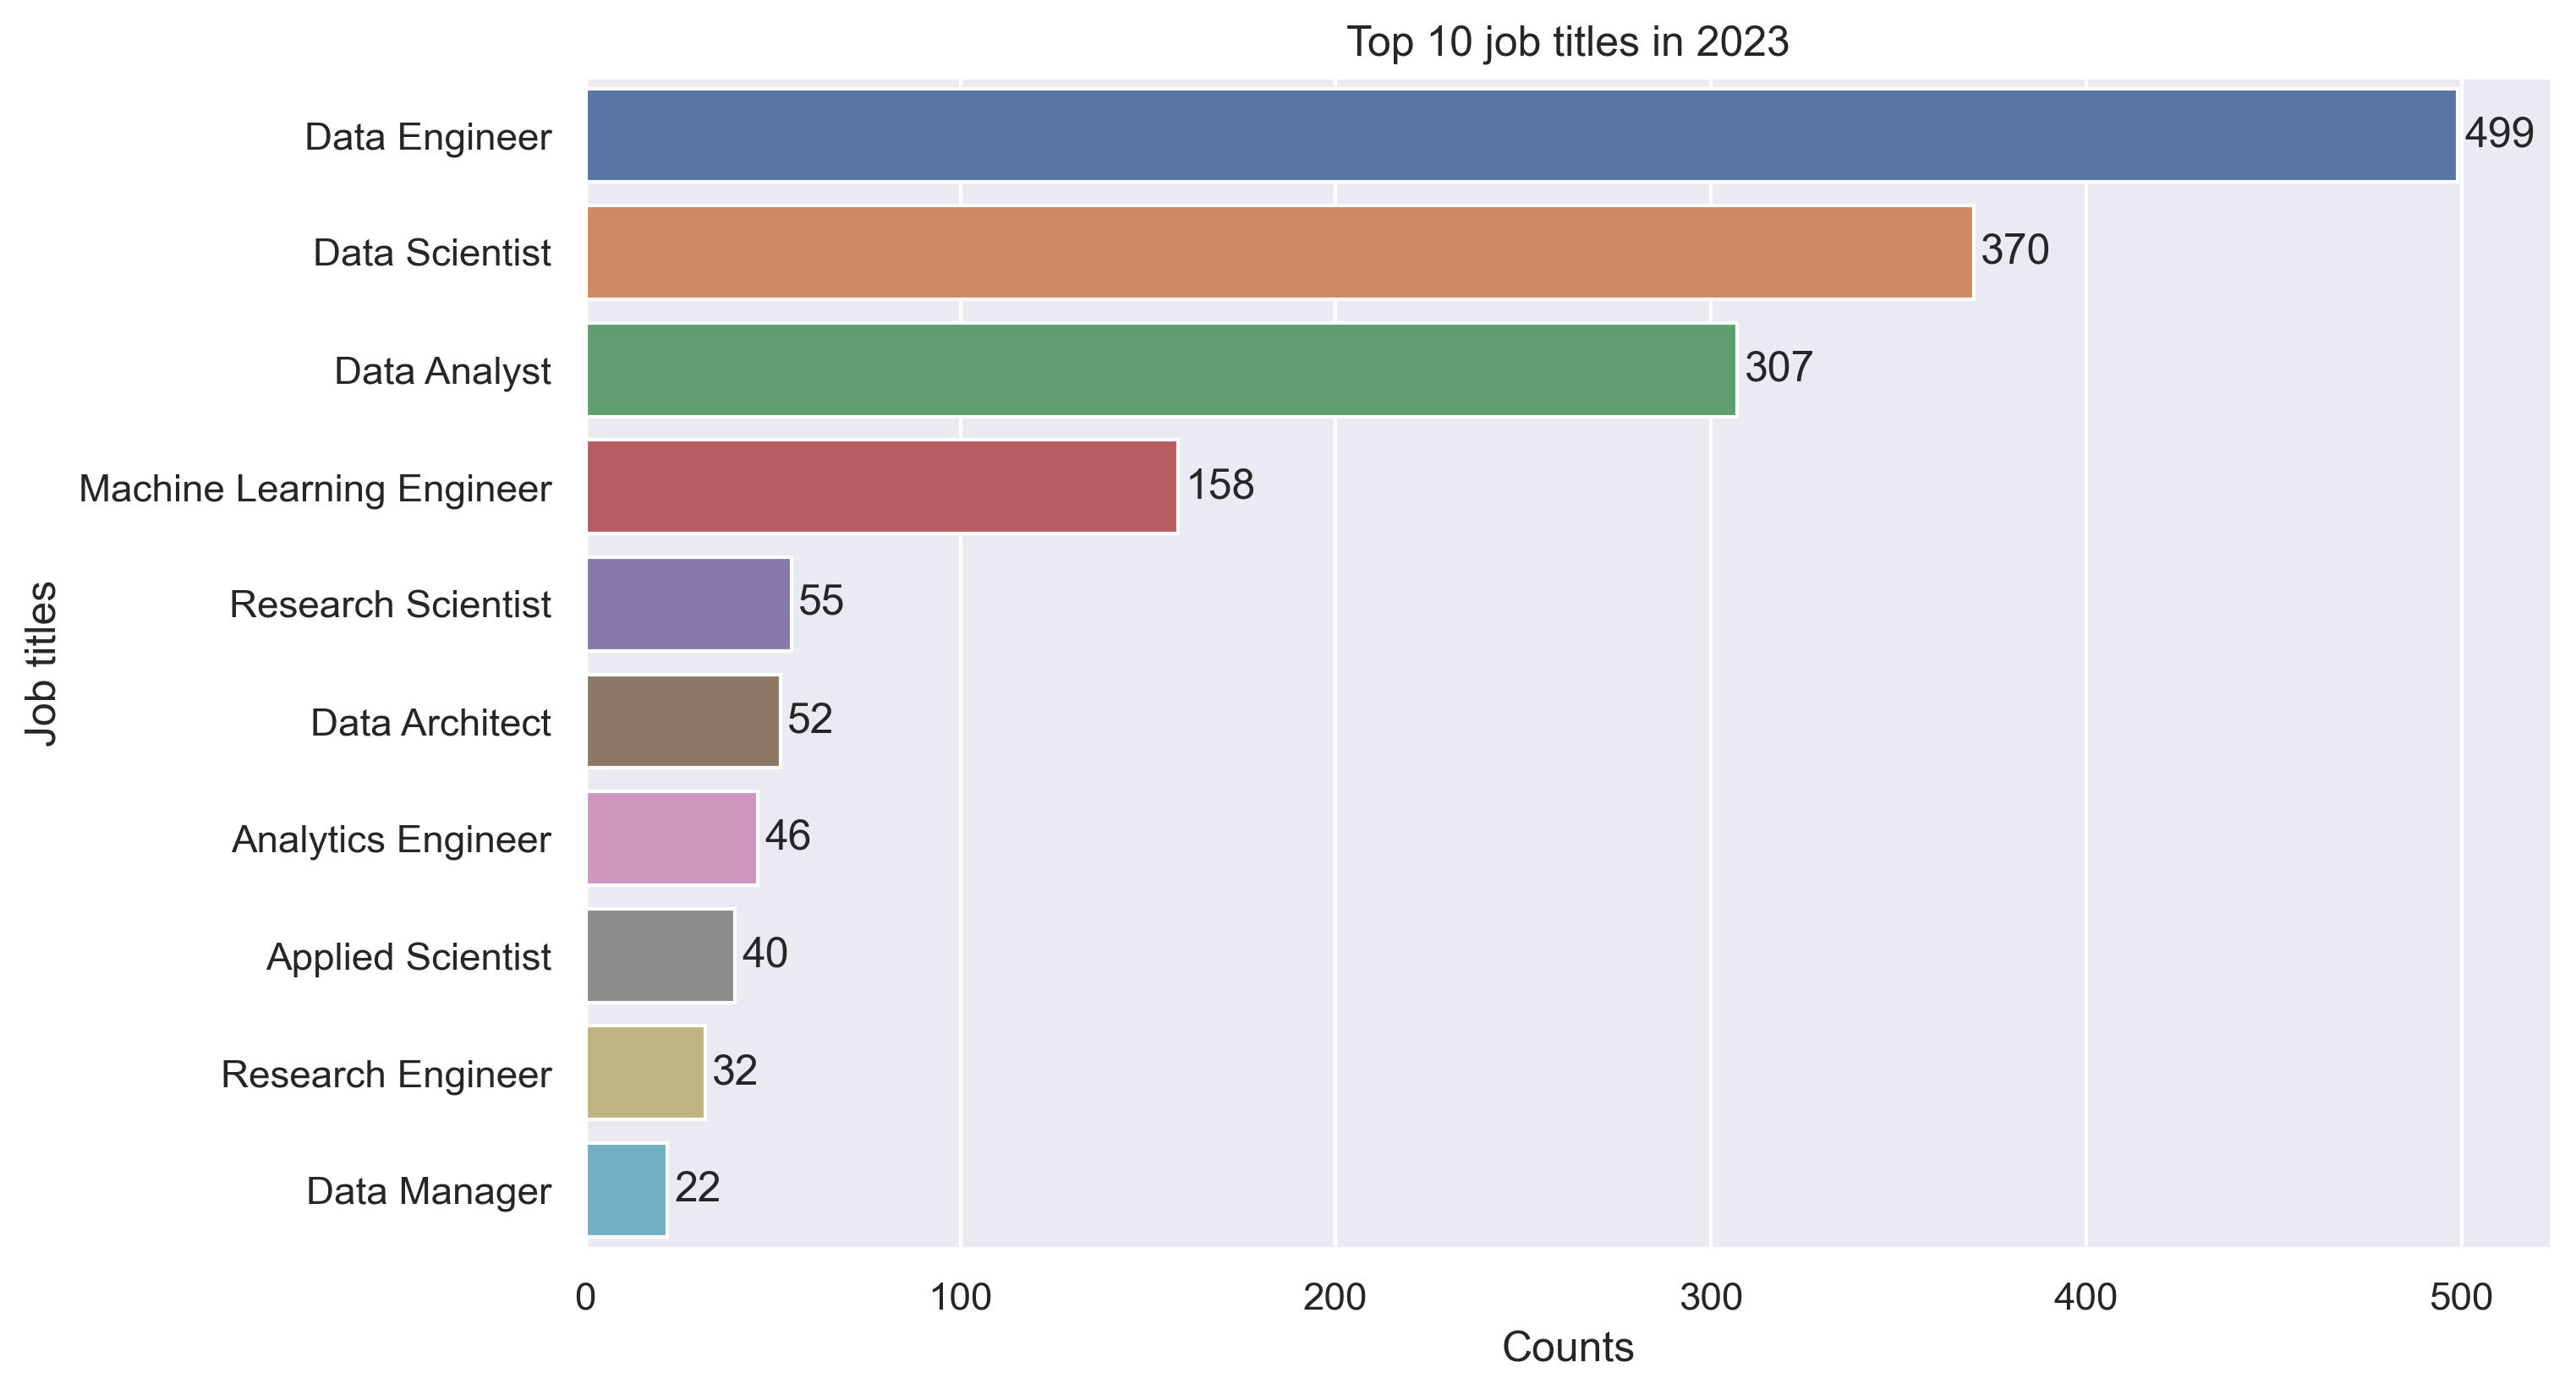

In [33]:
jobs = df[df["work_year"] == 2023]["job_title"].value_counts().nlargest(10).reset_index() 
fig,ax = plt.subplots()
ax = sbn.barplot(ax = ax,data = df,y = jobs["index"],x = jobs.job_title)
ax.set(ylabel = "Job titles",xlabel = "Counts",title = "Top 10 job titles in 2023")
ax.bar_label(ax.containers[0],padding = 2)
plt.savefig("SSjobs.png")

In [14]:
df.experience_level.unique() # kısaltılmış halleri değiştirmemiz lazım. 

array(['SE', 'MI', 'EN', 'EX'], dtype=object)

In [15]:
df.experience_level = df.experience_level.replace("EN","Junior").replace("MI","Mid-level").replace("SE","Senior").replace("EX","Director")

[Text(0, 0, '2516'), Text(0, 0, '805'), Text(0, 0, '320'), Text(0, 0, '114')]

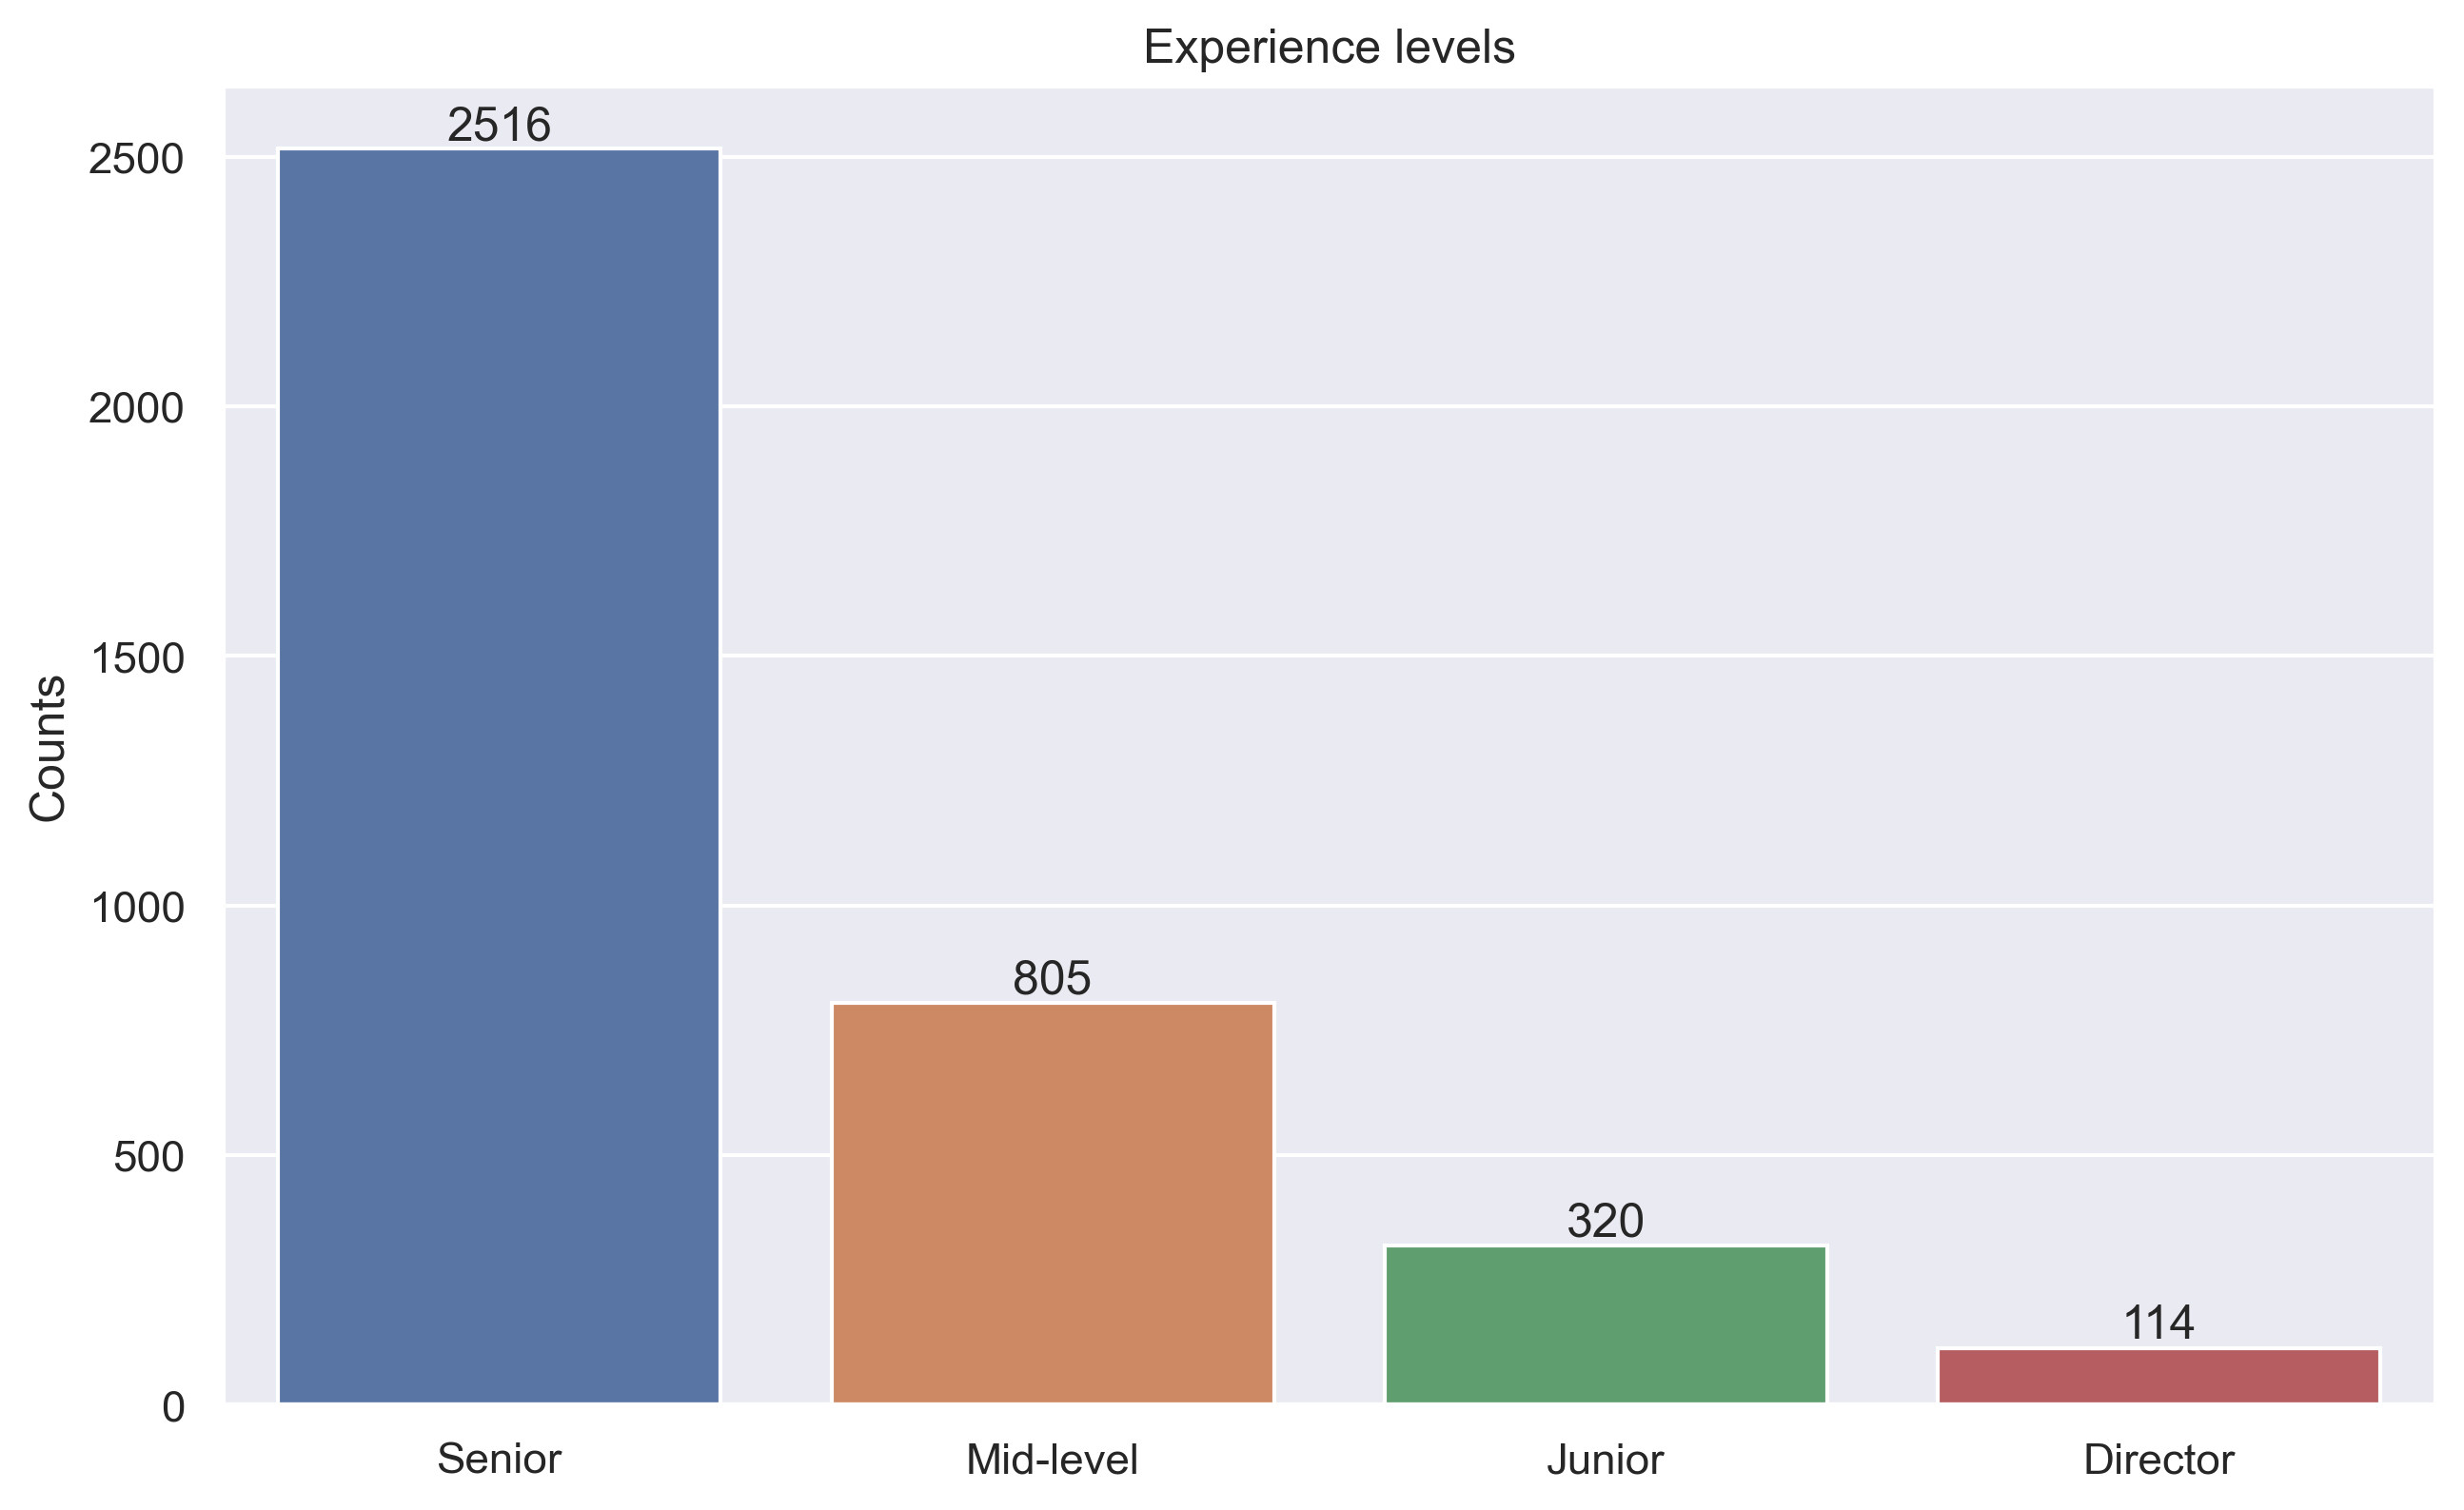

In [16]:
fig,ax = plt.subplots()
sbn.countplot(ax = ax,data = df,x = df.experience_level)
ax.set(xlabel = "",ylabel="Counts",title = "Experience levels")
ax.bar_label(ax.containers[0])

In [17]:
df.employment_type.unique() # 4 adet çalışma tipi var

array(['FT', 'CT', 'FL', 'PT'], dtype=object)

In [18]:
df.employment_type = df.employment_type.replace("FT","Full-Time").replace("FL","Freelance").replace("CT","Contract").replace("PT","Part-Time") # ard arda replace kullanabiliriz.

[Text(0, 0, '113'), Text(0, 0, '1'), Text(0, 0, '0'), Text(0, 0, '0')]

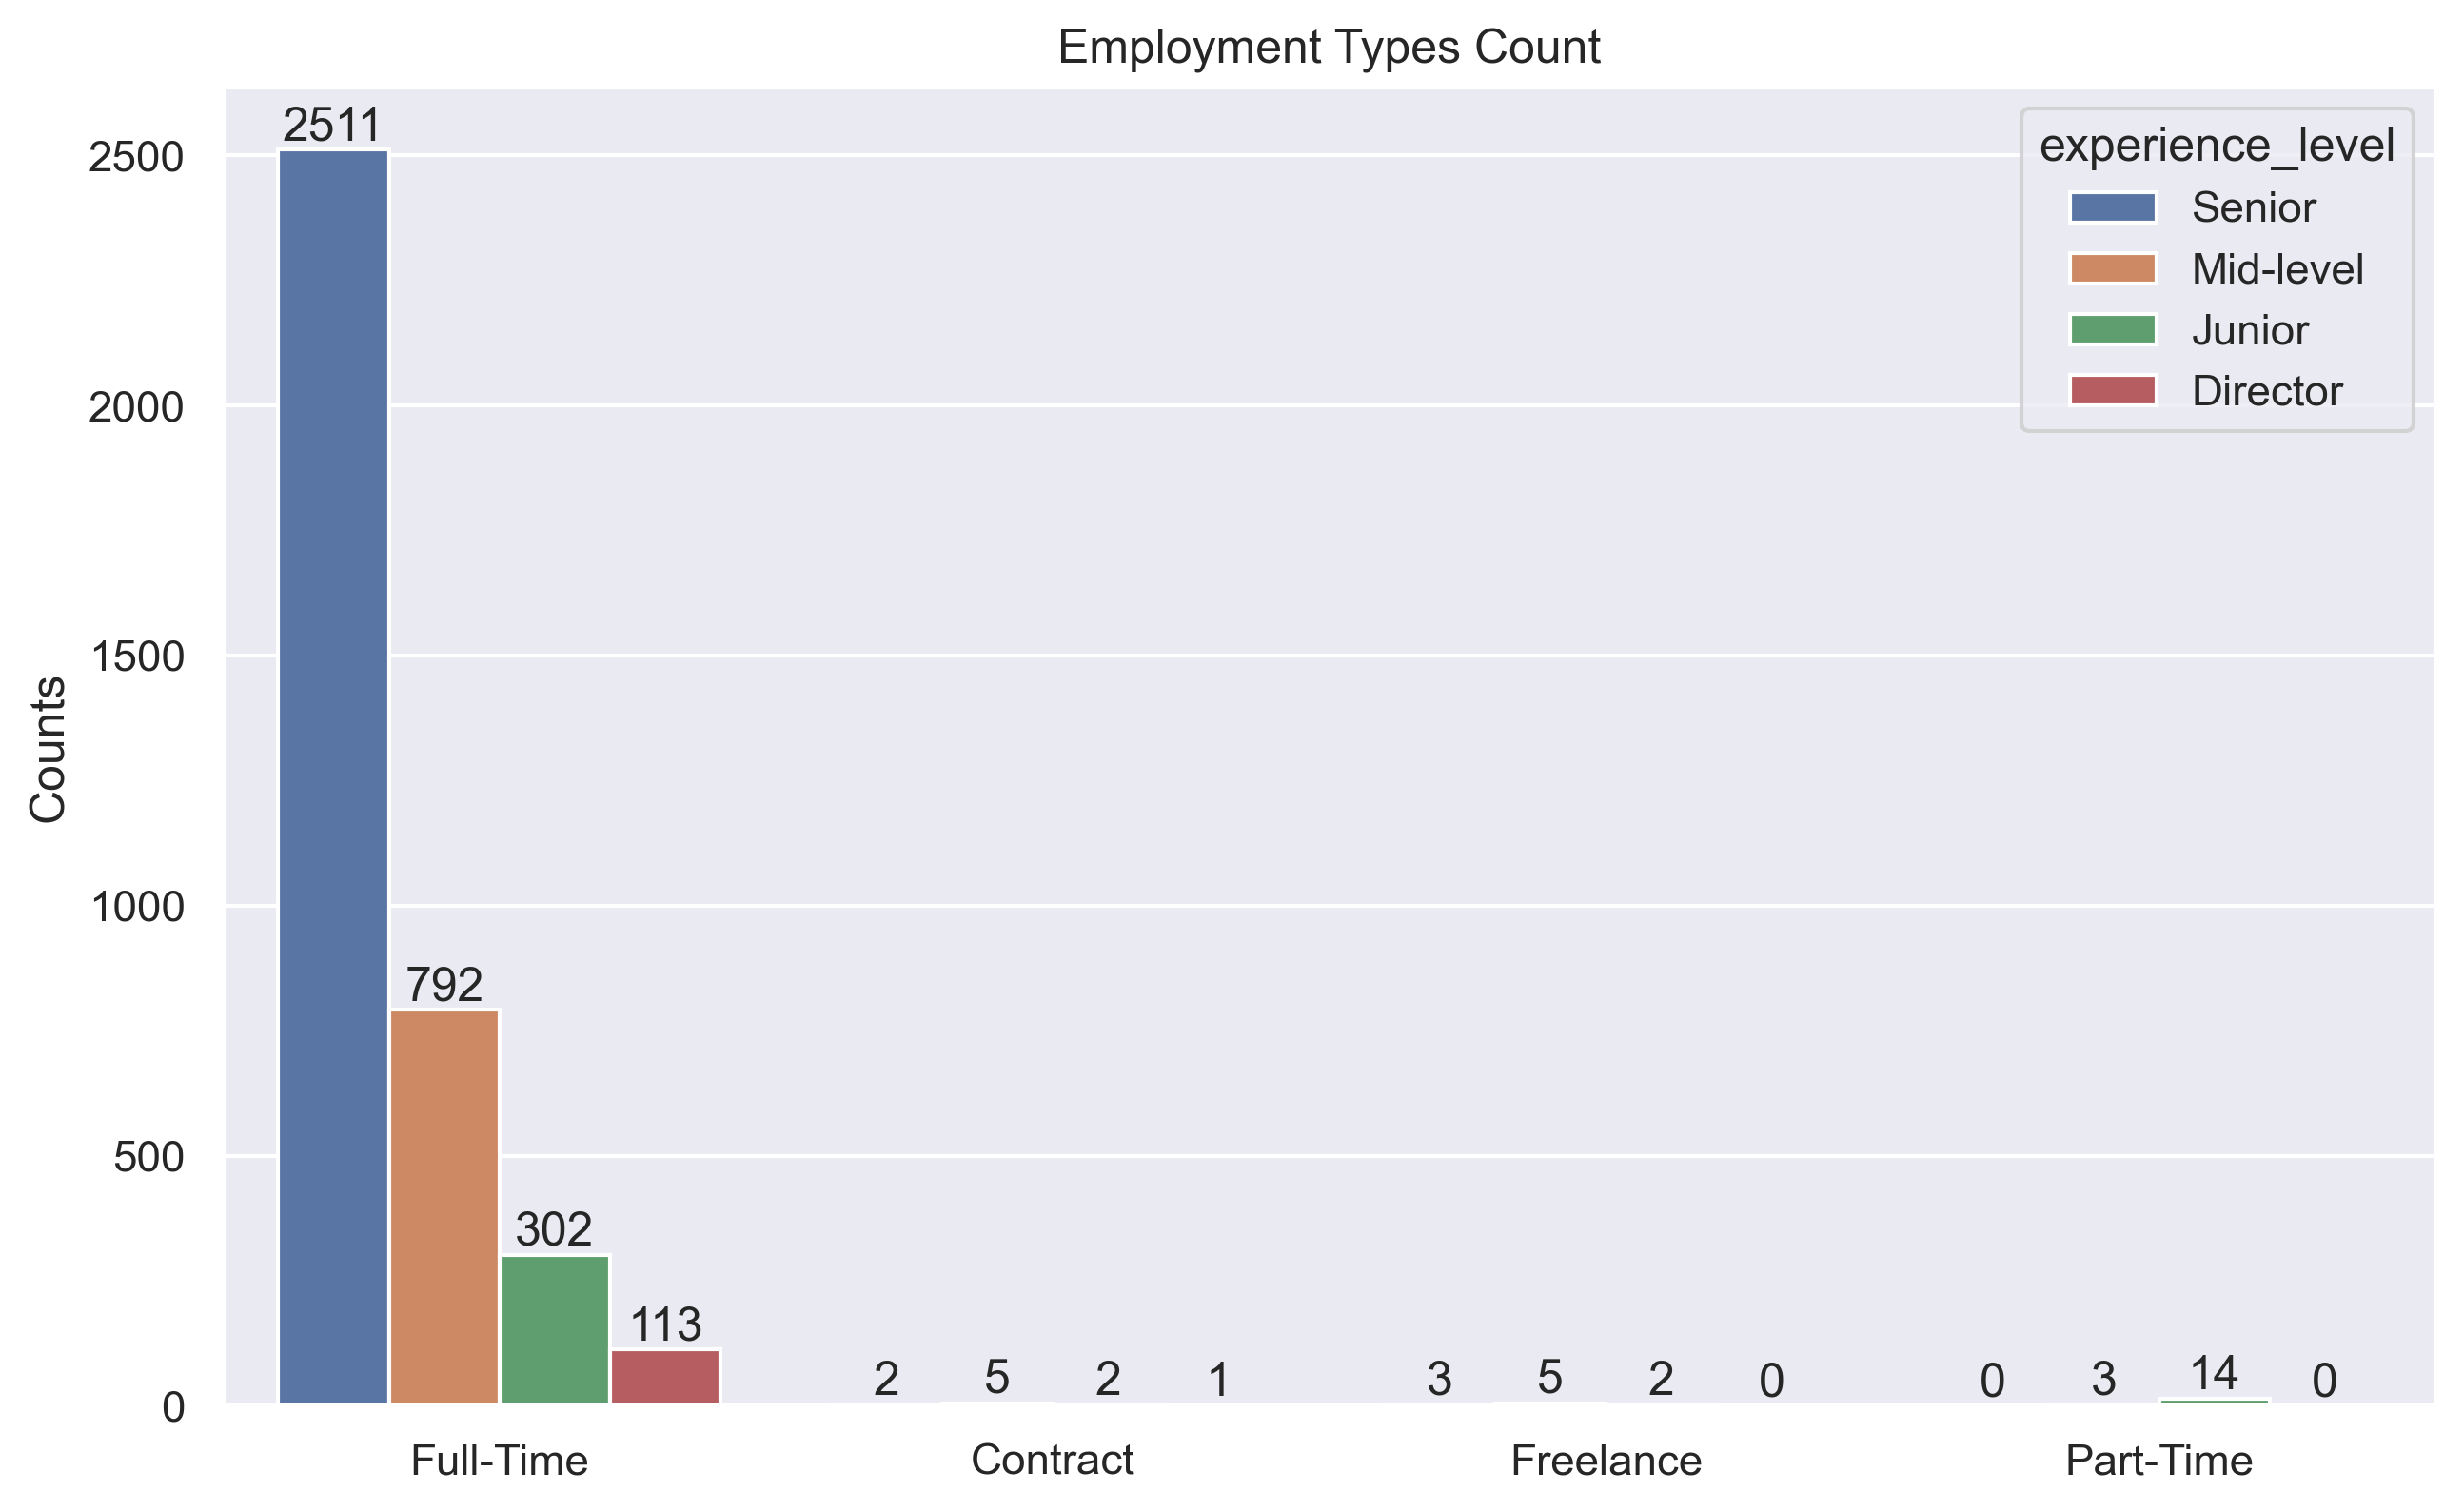

In [19]:
fig,ax = plt.subplots()
sbn.countplot(ax = ax,data = df,x = df.employment_type,hue = "experience_level")
ax.set(xlabel = "",ylabel = "Counts",title="Employment Types Count")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3])

In [24]:
# ortalama maaşlar (tecrübeye göre)...
salaries = df.groupby("employment_type")["salary_in_usd"].mean().round(0).sort_values(ascending = False).reset_index()
salaries

,employment_type,salary_in_usd
0,Full-Time,138314.0
1,Contract,113447.0
2,Freelance,51808.0
3,Part-Time,39534.0


[Text(0, 2, '149367'),
 Text(0, 2, '27750'),
 Text(0, 2, '50000'),
 Text(0, 2, '17779')]

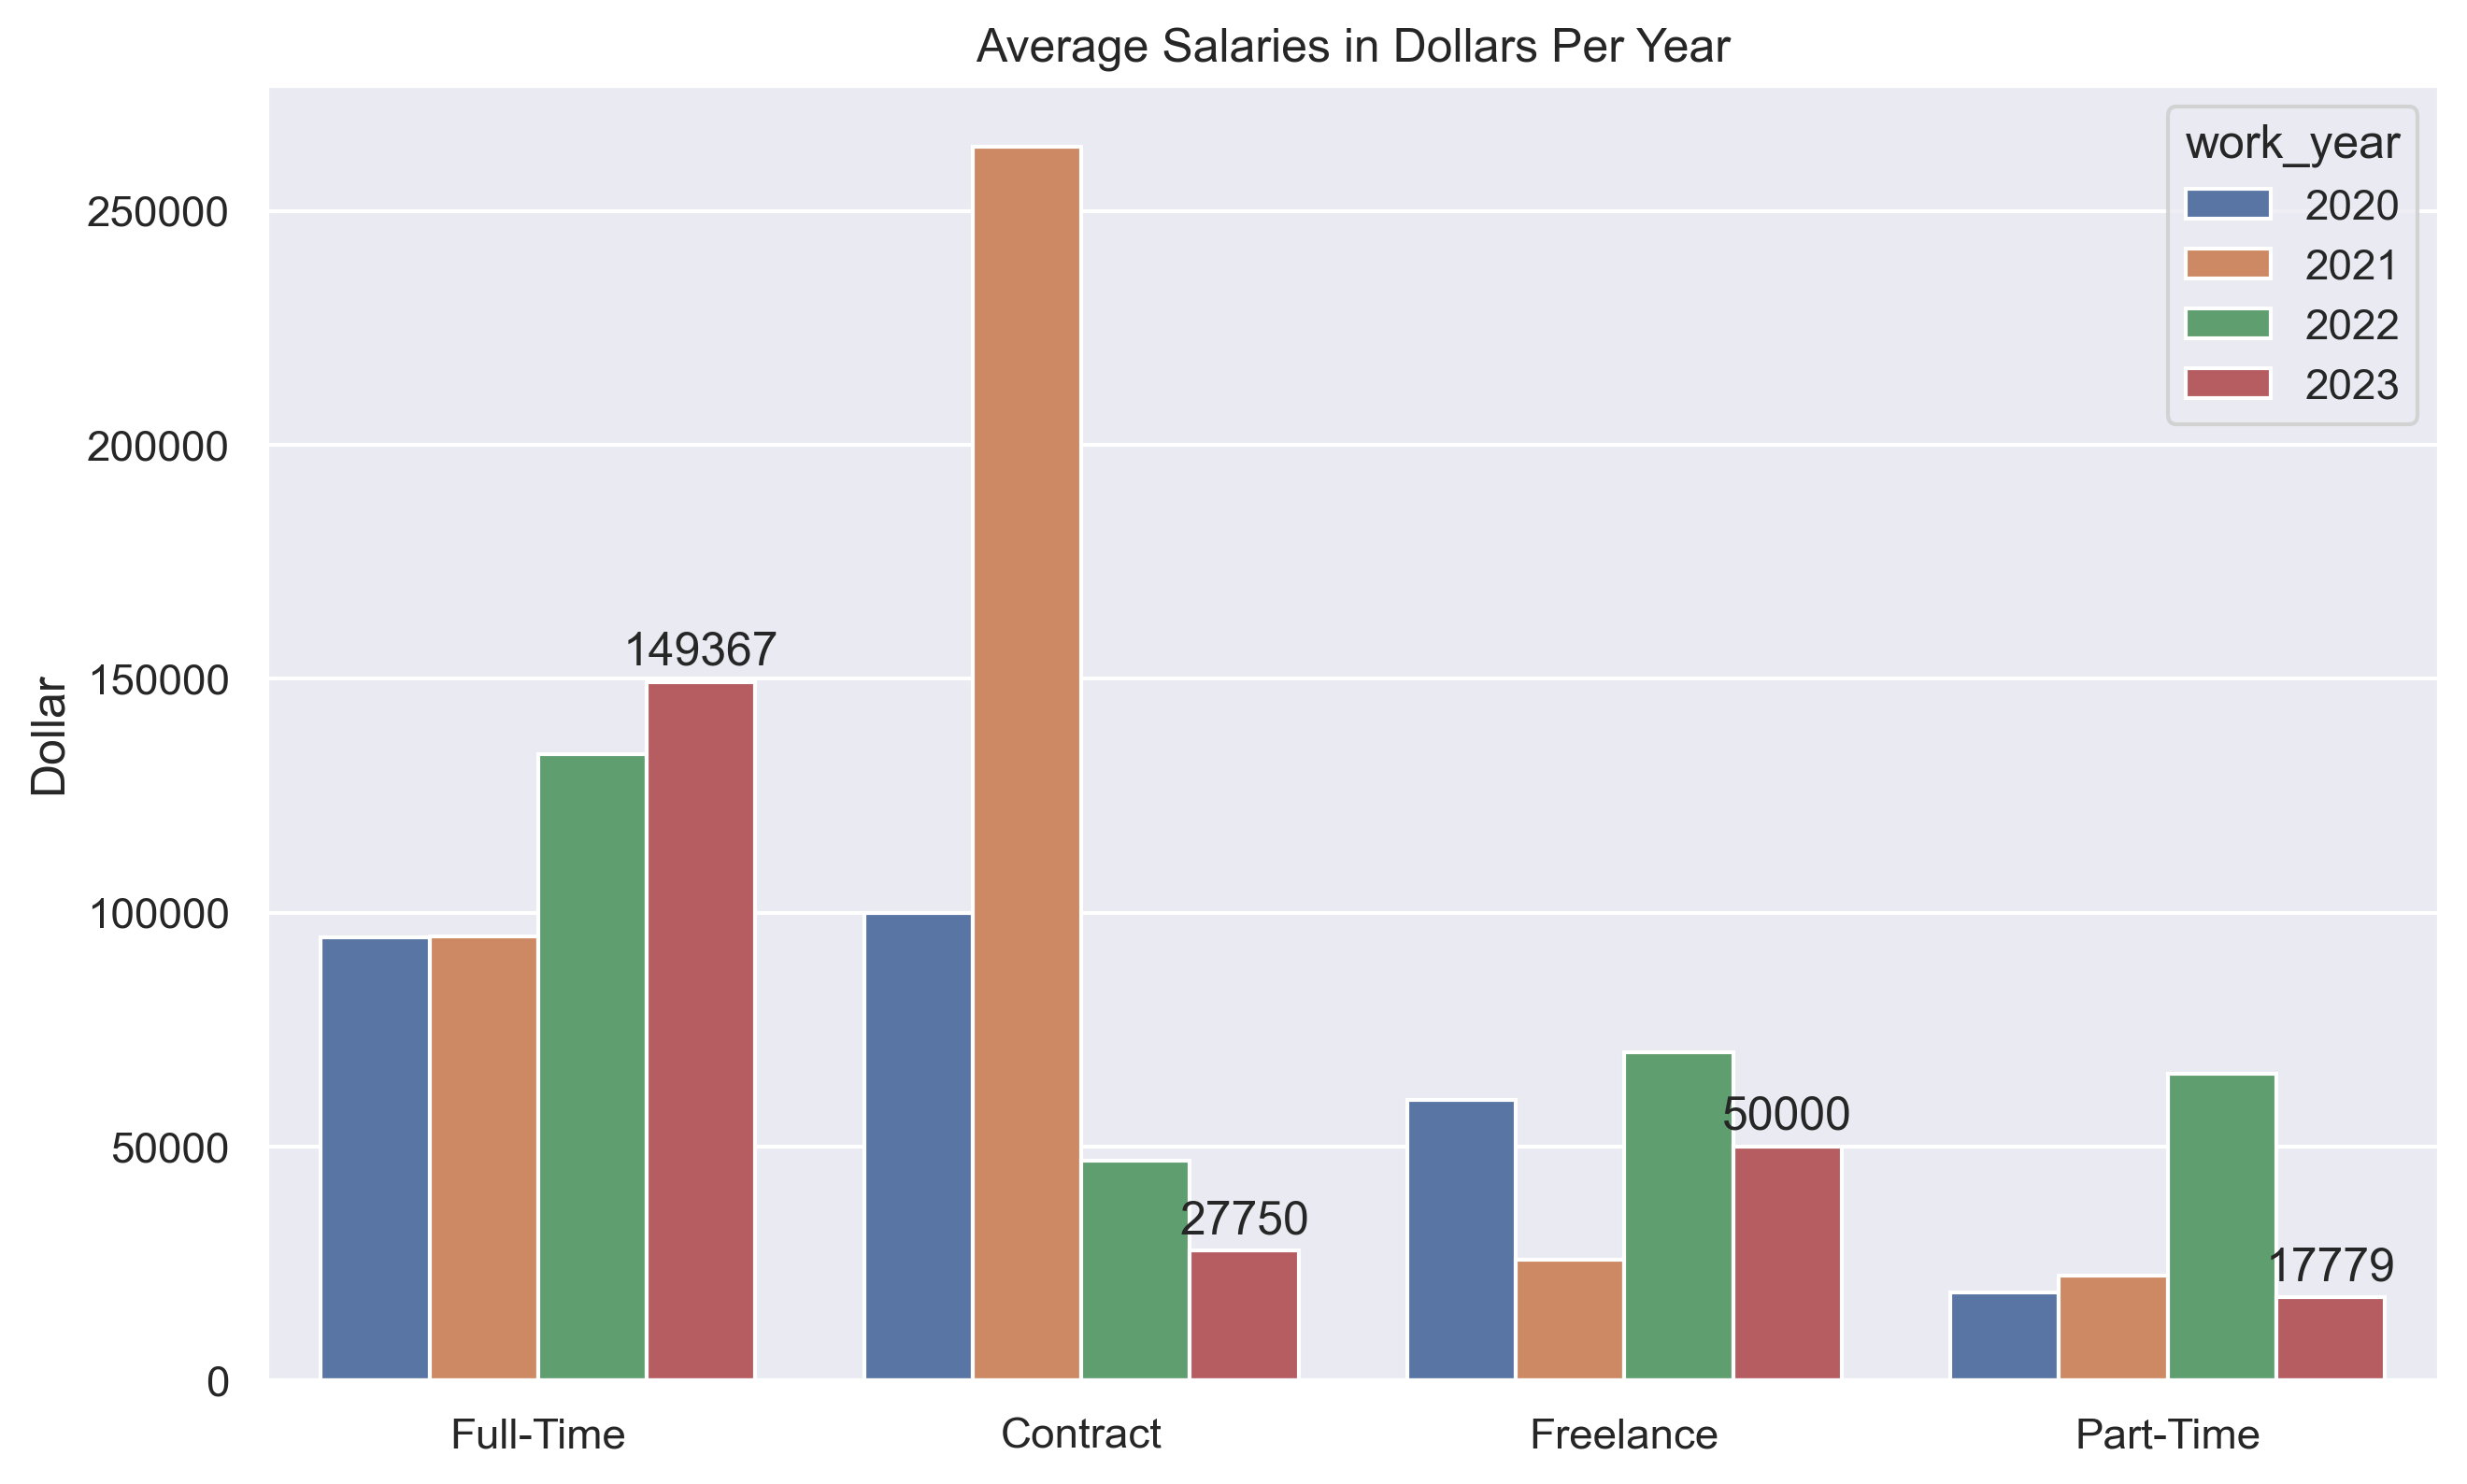

In [26]:
fig,ax = plt.subplots()
sbn.barplot(ax = ax,data = df,x = "employment_type",y = "salary_in_usd",errorbar = None,hue = "work_year")
ax.set(xlabel = "",ylabel = "Dollar",title="Average Salaries in Dollars Per Year")
ax.bar_label(ax.containers[3],padding = 2)



In [28]:
yearsSalary = df.salary_in_usd.groupby(df["work_year"]).mean()
yearsSalary

work_year
2020     92302.631579
2021     94087.208696
2022    133338.620793
2023    149045.541176
Name: salary_in_usd, dtype: float64

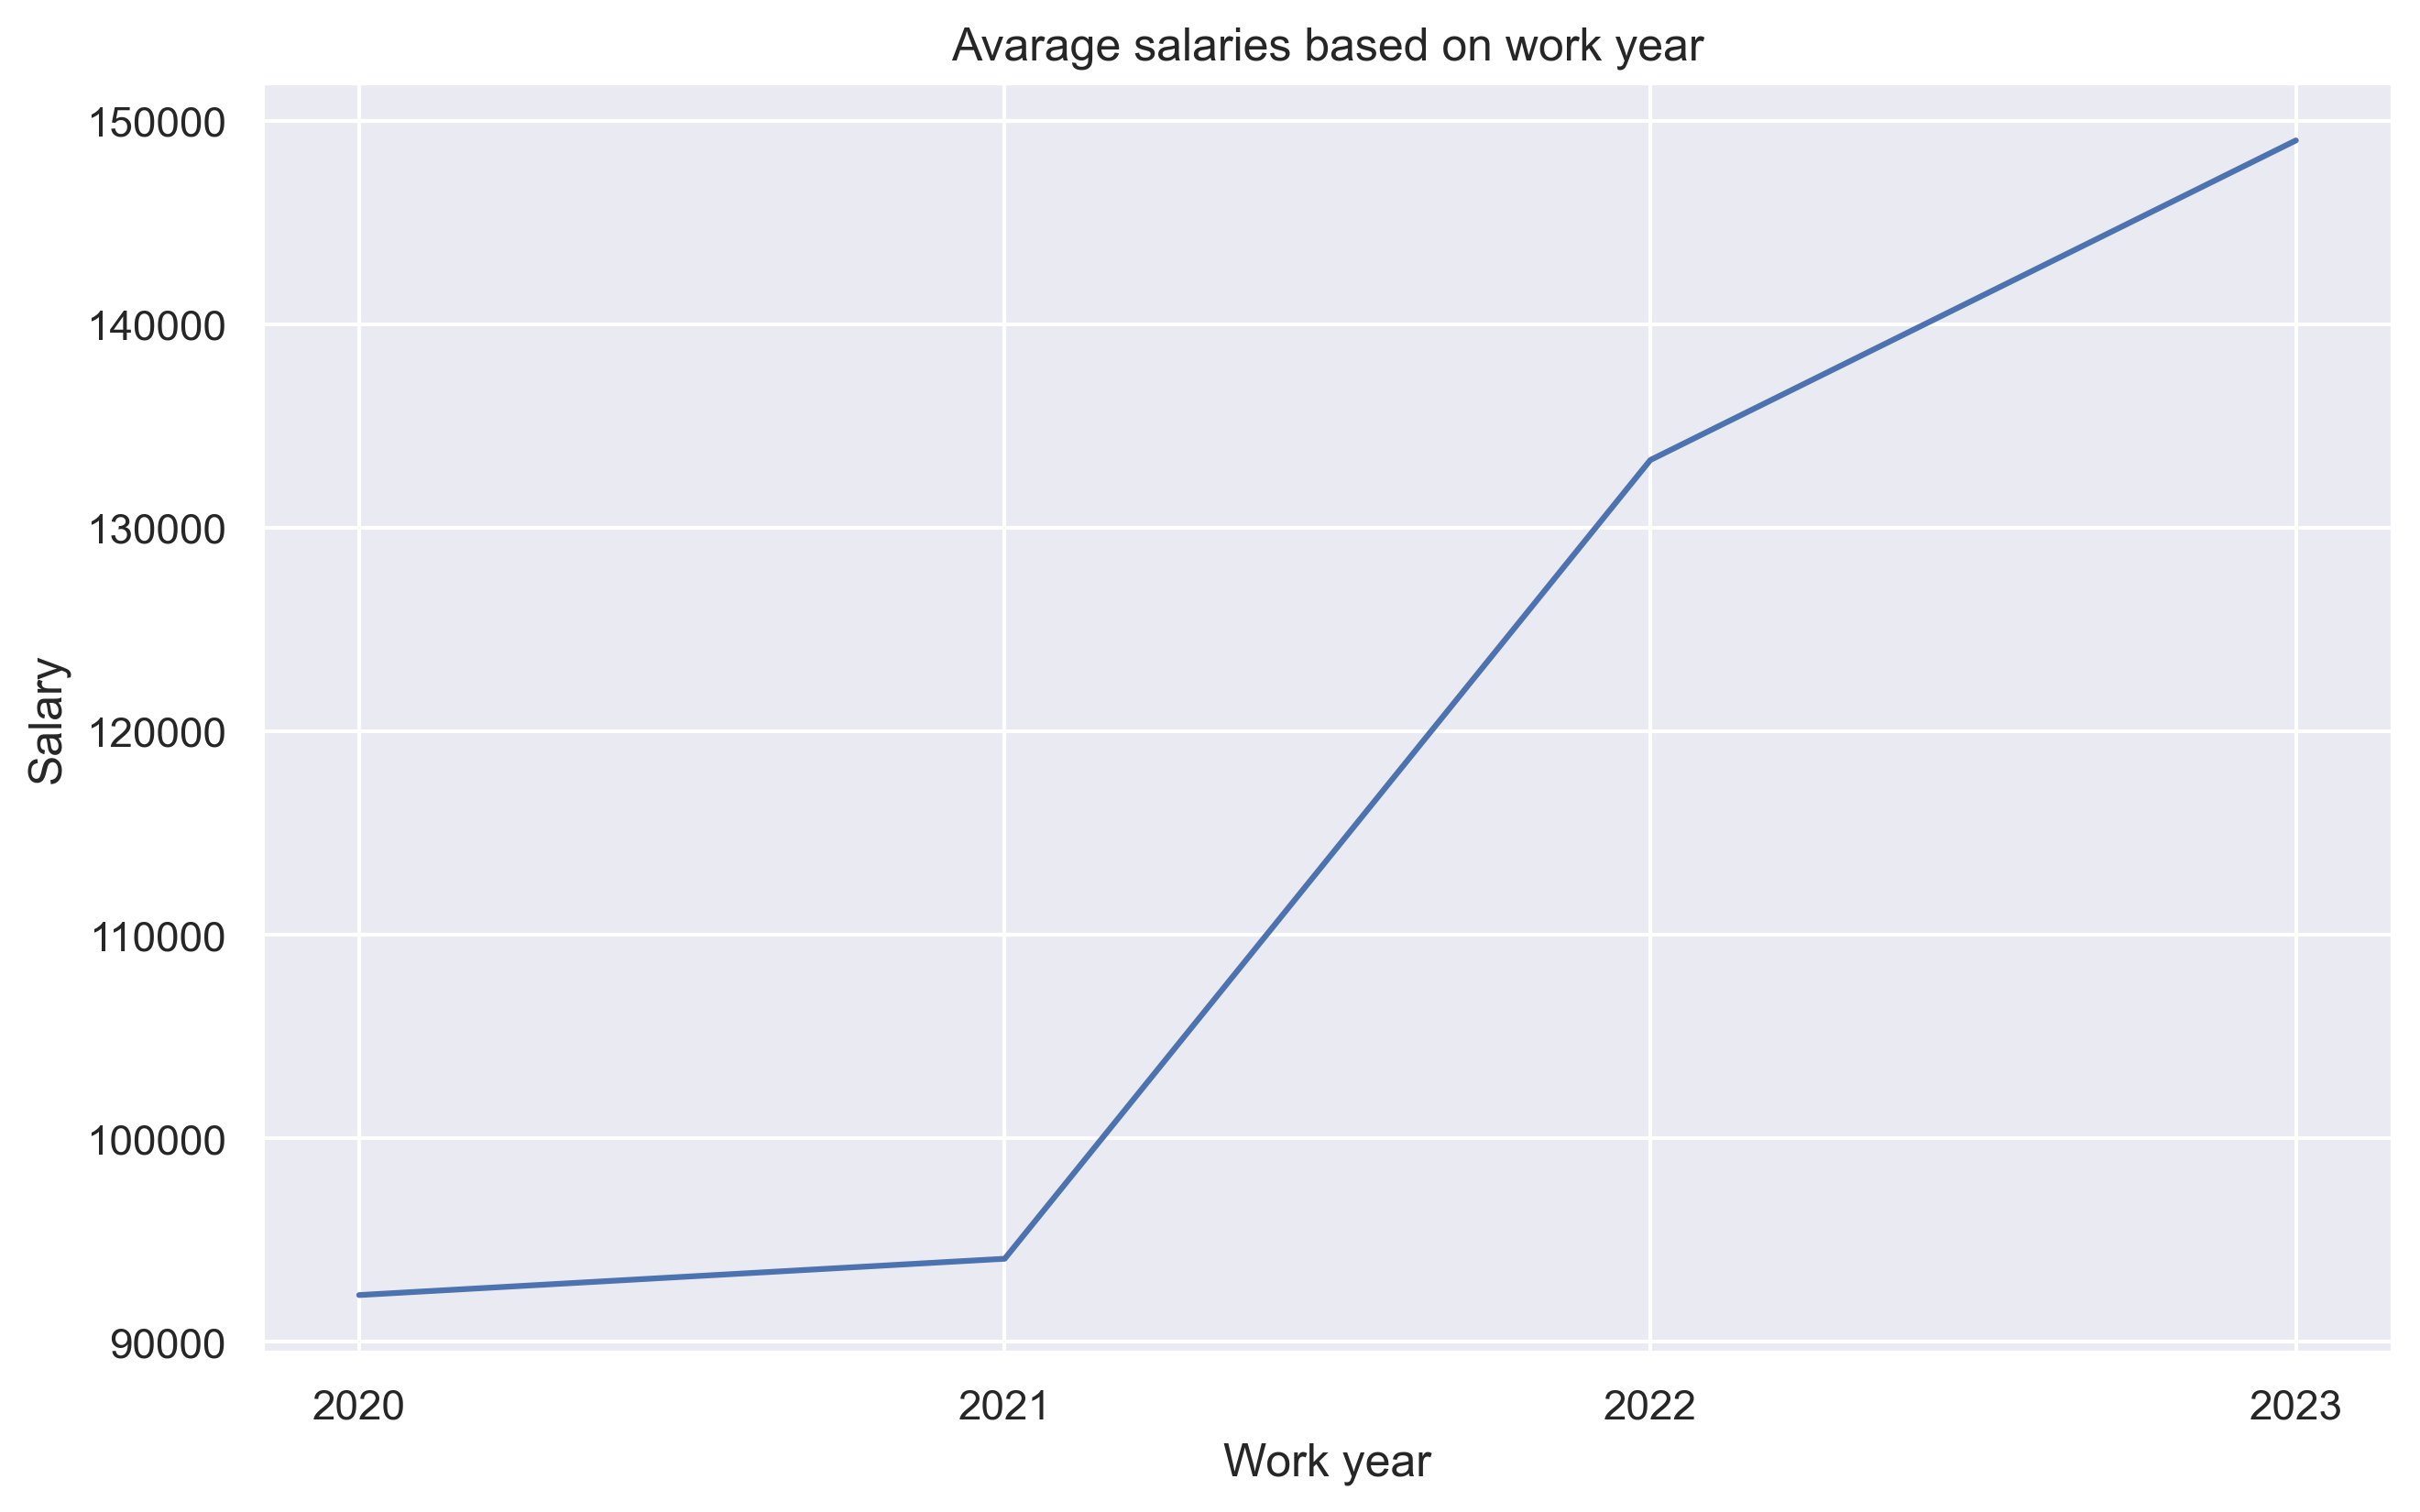

In [31]:
plt.title("Avarage salaries based on work year")
plt.xlabel("Work year")
plt.ylabel("Salary")
sbn.lineplot(x = ["2020","2021","2022","2023"],y = yearsSalary)
plt.show()